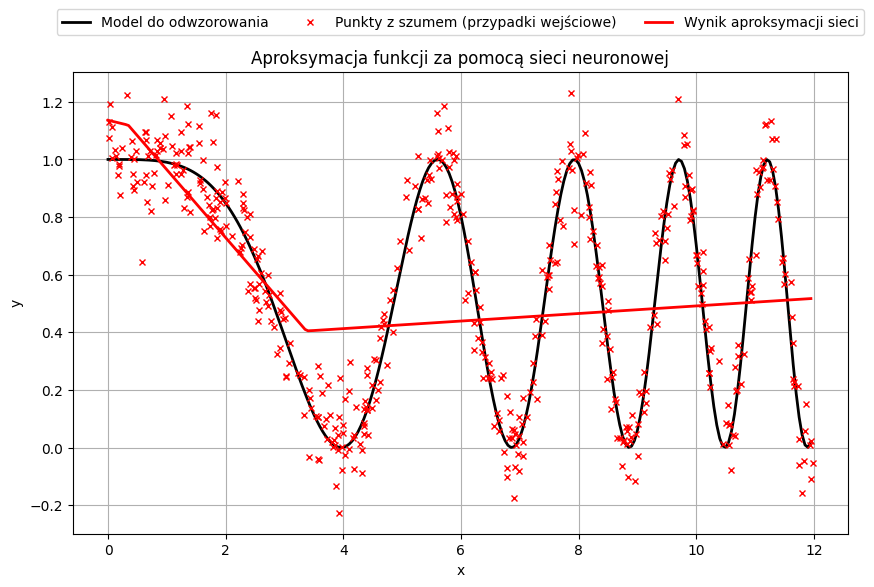

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# --- Inicjalizacja parametrów ---
ile_danych = 500  # Liczba przypadków uczących
ile_epok = 1000   # Liczba epok (zwiększono dla lepszego dopasowania w scikit-learn)
a = 0             # Początek przedziału
b = 12            # Koniec przedziału

# --- Generowanie i rysowanie funkcji oryginalnej ---
# Tworzymy wektor x od 'a' do 'b' z krokiem 0.05
x = np.arange(a, b, 0.05).reshape(-1, 1)
# Obliczamy odpowiadające wartości y zgodnie ze wzorem
y = 0.5 * np.cos(0.2 * x**2) + 0.5

# Rozpoczynamy tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k', linewidth=2, label='Model do odwzorowania')

# --- Generowanie danych uczących z szumem ---
# Losujemy 'ile_danych' punktów x w przedziale [a, b]
x_siec = a + (b - a) * np.random.rand(ile_danych, 1)
# Obliczamy wartości y dla wylosowanych x i dodajemy szum normalny
y_siec = 0.5 * np.cos(0.2 * x_siec**2) + 0.5 + 0.1 * np.random.randn(ile_danych, 1)

# Rysujemy zaszumione dane uczące
plt.plot(x_siec, y_siec, 'rx', markersize=5, label='Punkty z szumem (przypadki wejściowe)')

# --- Definicja i uczenie sieci neuronowej ---
# Definicja architektury sieci: jedna warstwa ukryta z 12 neuronami.
# solver='adam' to popularny i wydajny algorytm optymalizacji.
# max_iter odpowiada liczbie epok.
# random_state zapewnia powtarzalność wyników.
net = MLPRegressor(hidden_layer_sizes=(12,), max_iter=ile_epok, solver='adam', random_state=1)

# Trenowanie sieci na danych (y_siec.ravel() konwertuje wektor kolumnowy na jednowymiarowy)
net.fit(x_siec, y_siec.ravel())

# --- Predykcja i rysowanie wyniku ---
# Generowanie aproksymacji (predykcji) przez sieć dla oryginalnego wektora x
ypred = net.predict(x)

# Rysowanie wykresu aproksymacji
plt.plot(x, ypred, 'r', linewidth=2, label='Wynik aproksymacji sieci')

# --- Finalizacja wykresu ---
plt.title('Aproksymacja funkcji za pomocą sieci neuronowej')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.grid(True)
plt.show()

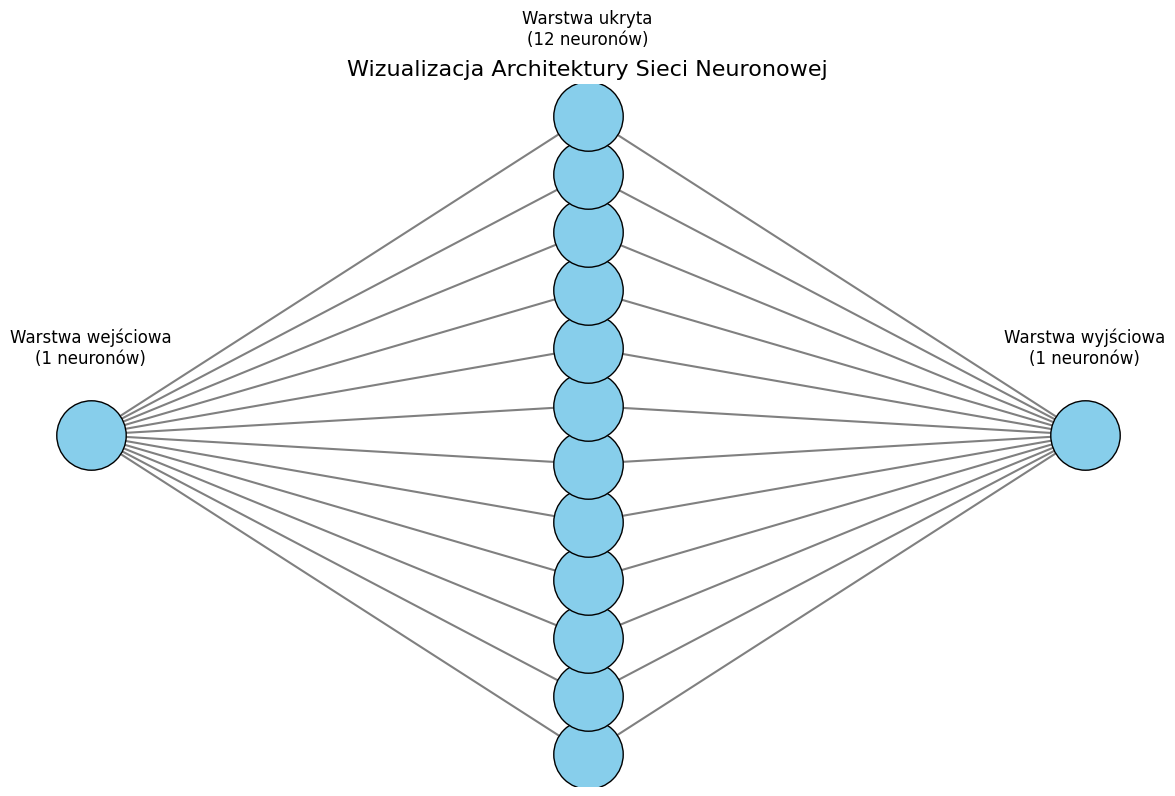

In [16]:
# Komórka do wizualizacji sieci neuronowej
import matplotlib.pyplot as plt

# Upewnij się, że obiekt 'net' z poprzedniej komórki został wytrenowany i jest dostępny.
# Sprawdzamy, czy zmienna 'net' istnieje i czy model jest wytrenowany (ma atrybut 'coefs_')
if 'net' in locals() and hasattr(net, 'coefs_'):
    # Pobranie architektury z wytrenowanego modelu
    # Liczba cech na wejściu (neuronów w warstwie wejściowej)
    n_inputs = net.n_features_in_
    # Liczba neuronów w warstwie ukrytej (pierwszy element krotki)
    n_hidden = net.hidden_layer_sizes[0]
    # Liczba neuronów na wyjściu
    n_outputs = net.n_outputs_

    # Tworzenie figury i osi do rysowania
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title('Wizualizacja Architektury Sieci Neuronowej', fontsize=16)

    # --- Rysowanie warstw ---
    # Definiujemy pozycje warstw na osi X
    layer_xs = [0, 2, 4]
    
    # Funkcja pomocnicza do rysowania neuronów w warstwie
    def draw_layer(n_neurons, x_pos, layer_name):
        # Obliczamy pozycje Y, aby warstwa była wyśrodkowana
        y_pos = [i - (n_neurons - 1) / 2 for i in range(n_neurons)]
        # Rysujemy neurony jako okręgi
        ax.scatter([x_pos] * n_neurons, y_pos, s=2500, c='skyblue', edgecolors='black', zorder=4)
        # Dodajemy etykietę warstwy
        ax.text(x_pos, max(y_pos) + 1.5, f'{layer_name}\n({n_neurons} neuronów)', ha='center', va='center', fontsize=12)
        return y_pos

    # Rysujemy poszczególne warstwy i zapisujemy pozycje ich neuronów
    input_ys = draw_layer(n_inputs, layer_xs[0], 'Warstwa wejściowa')
    hidden_ys = draw_layer(n_hidden, layer_xs[1], 'Warstwa ukryta')
    output_ys = draw_layer(n_outputs, layer_xs[2], 'Warstwa wyjściowa')

    # --- Rysowanie połączeń ---
    # Połączenia: Wejście -> Warstwa ukryta
    for i_y in input_ys:
        for h_y in hidden_ys:
            ax.plot([layer_xs[0], layer_xs[1]], [i_y, h_y], 'gray', zorder=1)

    # Połączenia: Warstwa ukryta -> Wyjście
    for h_y in hidden_ys:
        for o_y in output_ys:
            ax.plot([layer_xs[1], layer_xs[2]], [h_y, o_y], 'gray', zorder=1)

    # --- Ustawienia estetyczne wykresu ---
    ax.axis('off') # Wyłączamy osie dla czystszego wyglądu
    fig.tight_layout()
    plt.show()

else:
    print("BŁĄD: Obiekt 'net' nie został znaleziony lub wytrenowany.")
    print("Uruchom najpierw komórkę z kodem trenującym sieć, a następnie tę komórkę.")